## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
#用.text查看抓取下來的網頁原始碼
data = response.text

# 用 request 傳送回來的資料不會認的斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
#看第一筆資料的樣子
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd

idx, images = zip(*[a.split() for a in data if a])
arrange_data = {
    '編號': idx,
    '連結': images
}

df = pd.DataFrame(arrange_data)
df.head()

,編號,連結
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

## df['column_name'] 、df[row_start_index, row_end_index]
### 選取指定整列資料
* df[1:]:表示選取df第一行(第一筆觀察值之後的所有觀察值)
* df[:2]:第2行(第二筆觀察值)之前的資料(不含第2行)

## df.loc[index,column]
### 在知道列名字的情況下，用來選取指定行、列的資料
* df.loc[0,'name']:表示選取第0行，name那一列的資料

## iloc[row_index, column_index]
### iloc，在column name特別長或者index是時間序列等各種不方便輸入的情況下，可以用iloc (i = index)
* df.iloc[1,2]:選取第一行第二列的資料
* df.iloc[start_index : end_index, start_column : end_column]

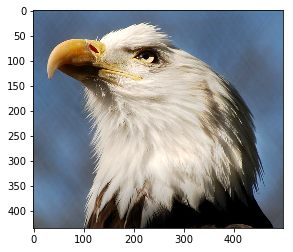

In [6]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df['連結'].iloc[0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
plt.imshow(img)
plt.show()

In [7]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        print("Start to read:" + str(url))
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            print("Fail to read url:" + str(url))
    return img_list

Start to read:http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
Start to read:http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
Start to read:http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
Start to read:http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
Start to read:http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Fail to read url:http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


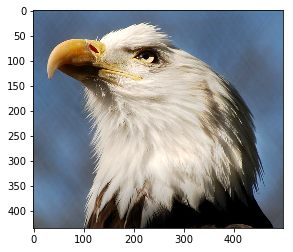

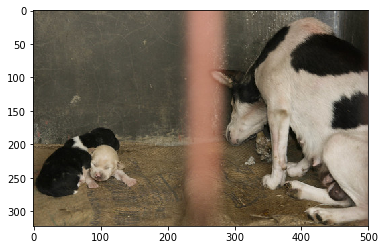

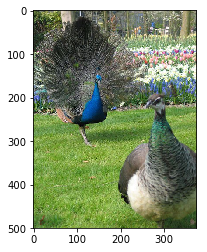

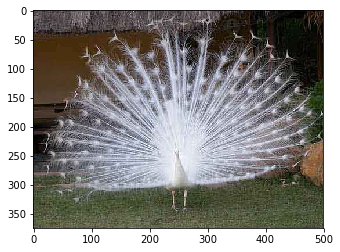

In [8]:
result = img2arr_fromURLs(df[0:5]['連結'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()